- *Sinh viên làm trực tiếp vào file này, thêm code vào những chỗ TODO*
- *Ouput đúng được đính kèm.*
- Trong bài này các plot có thể khác style một chút, nhưng nội dung hiển thị phải giống.
- Chỉ dùng `matplotlib`, không dùng thêm thư viện vẽ hình khác.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Đọc Dataframe từ file csv, với các cột như sau
field_names = ['Region', 'Country', 'HIV Treatment Rate', 
               'GNI per capita (USD)', 'GDP growth (annual %)',
               'Adult literacy rate','GDP per capita growth']
world_df = pd.read_csv('Data/world_data.csv',skiprows=1,names=field_names)
world_df

,Region,Country,HIV Treatment Rate,GNI per capita (USD),GDP growth (annual %),Adult literacy rate,GDP per capita growth
0,Latin America & Caribbean,Aruba,NaN,24840.0,-18.589099,97.989998,-18.698324
1,South Asia,Afghanistan,10.75,500.0,-2.351101,37.266041,-5.364666
2,Sub-Saharan Africa,Angola,33.50,1690.0,-5.638215,69.215057,-8.672432
3,Europe & Central Asia,Albania,48.00,5270.0,-3.302082,98.500000,-2.745239
4,Europe & Central Asia,Andorra,NaN,NaN,-11.183940,NaN,-12.735078
...,...,...,...,...,...,...,...
213,Middle East & North Africa,"Yemen, Rep.",29.25,NaN,NaN,NaN,NaN
214,Sub-Saharan Africa,South Africa,72.75,6090.0,-6.342471,92.115764,-7.481093
215,Sub-Saharan Africa,Zambia,84.50,1130.0,-2.785055,87.500000,-5.595733
216,Sub-Saharan Africa,Zimbabwe,87.75,1460.0,-7.816951,89.271709,-9.670405


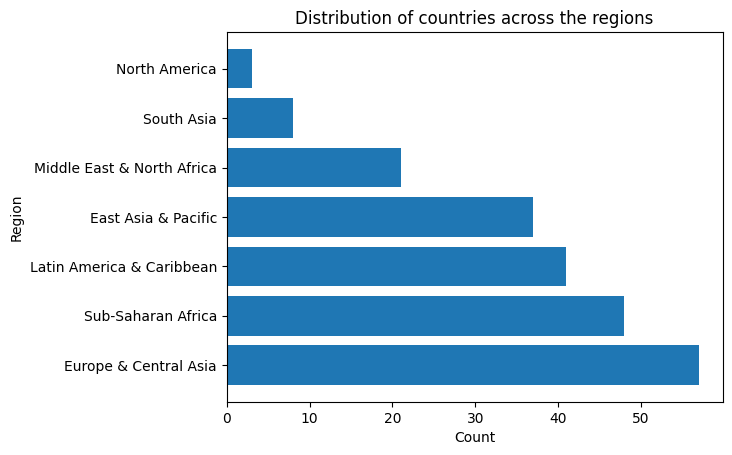

In [3]:
# Vẽ barplot cho các Region
countries_on_region = world_df.groupby('Region')['Country'].count().sort_values(ascending = False)
plt.barh(y = countries_on_region.index, width = countries_on_region.values)
plt.ylabel('Region')
plt.xlabel('Count')
plt.title('Distribution of countries across the regions')
plt.show()
# TODO

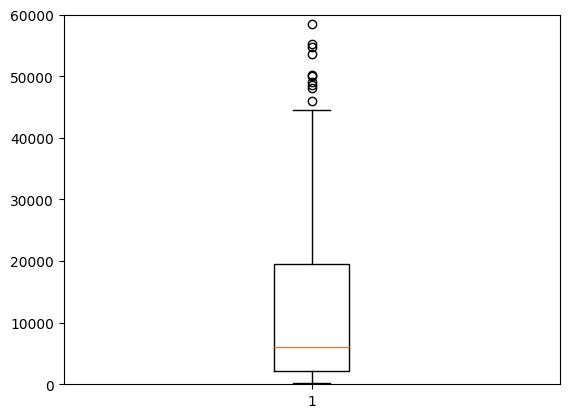

In [4]:
# Vẽ boxplot cho 'GNI per capita (USD)'
GNI_per_capita = world_df['GNI per capita (USD)']
plt.boxplot(GNI_per_capita.dropna())
plt.ylim(0, 60000)
plt.show()

# TODO

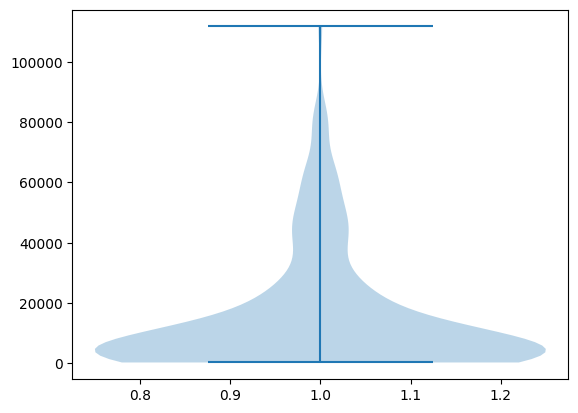

In [5]:
# Vẽ violinplot cho 'GNI per capita (USD)'
plt.violinplot(GNI_per_capita.dropna())
plt.show()
# TODO

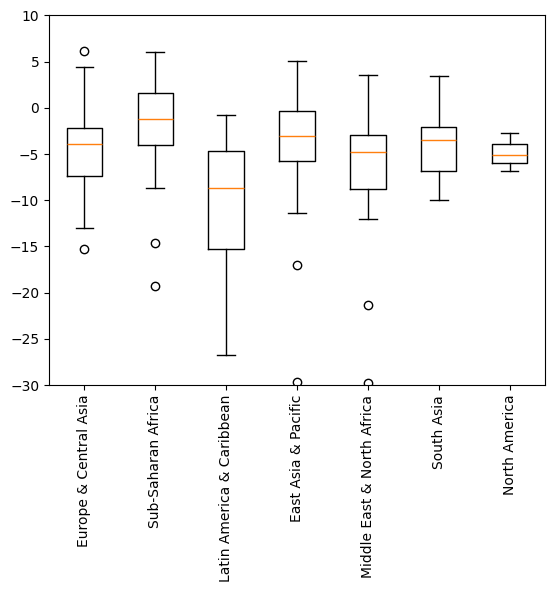

In [6]:
# Vẽ boxplot của các Region lên cùng một biểu đồ
regions = ['Europe & Central Asia', 'Sub-Saharan Africa', 'Latin America & Caribbean',
           'East Asia & Pacific', 'Middle East & North Africa', 'South Asia', 'North America']
gdp_region = world_df.groupby('Region')['GDP growth (annual %)']

for i, region in enumerate(regions):
    data_region = gdp_region.get_group(region).dropna().values
    plt.boxplot(data_region, widths = 0.5, positions = [i + 1], labels = [region])
    
plt.xticks(range(1, len(regions) + 1), regions, rotation = 90)
plt.ylim(-30, 10)
plt.show()
# TODO

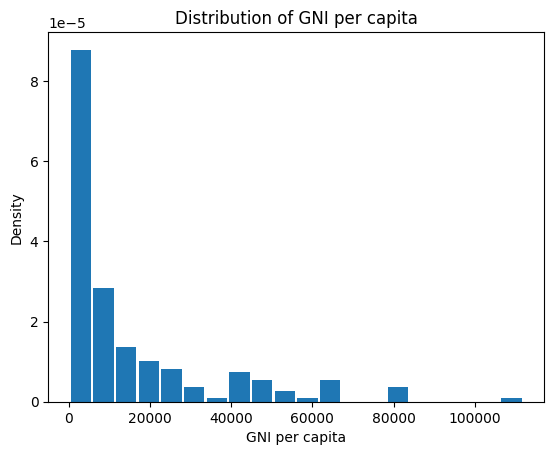

In [7]:
# Vẽ histogram của 'GNI per capita (USD)'
plt.hist(x = GNI_per_capita.values, bins = 20, density = True, rwidth = 0.9)
plt.xlabel('GNI per capita')
plt.ylabel('Density')
plt.title('Distribution of GNI per capita')
plt.show()
# TODO

Gọi các vùng sau là bán cầu bắc (Northern)
- 'Europe & Central Asia'
- 'North America'
- 'East Asia & Pacific'
  
Gọi các vùng sau là bán cầu nam (Southern)
- 'Sub-Saharan Africa'
- 'Middle East & North Africa'
- 'South Asia'
- 'Latin America & Caribbean'

Text(0.5, 1.0, 'Distribution of gross national income per capita')

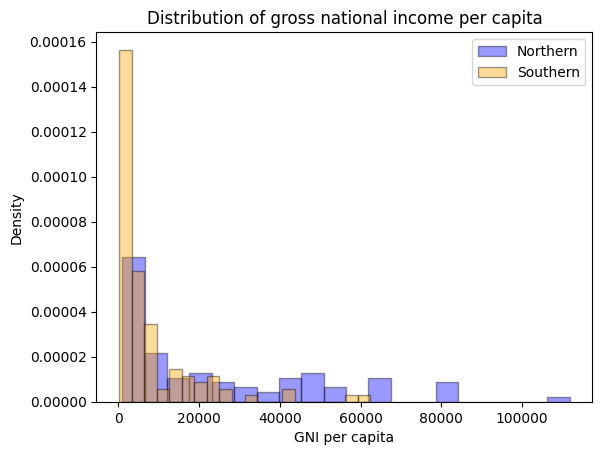

In [8]:
# Hãy vẽ 2 histogram thể hiện sự phân bố của cột 'GNI per capita (USD)'
# cho bán cầu bắc và bán cầu nam lên cùng một bản đồ
northern = ['Europe & Central Asia', 'North America', 'East Asia & Pacific']
southern = ['Sub-Saharan Africa', 'Middle East & North Africa', 'South Asia', 'Latin America & Caribbean']

N_countries = world_df.loc[world_df['Region'].isin(northern), 'GNI per capita (USD)']
S_countries = world_df.loc[world_df['Region'].isin(southern), 'GNI per capita (USD)']

plt.hist(x = N_countries.values, bins = 20, density = True, 
         color = 'blue', alpha = 0.4, edgecolor = 'black', label = 'Northern')
plt.hist(x = S_countries.values, bins = 20, density = True, 
         color = 'orange', alpha = 0.4, edgecolor = 'black', label = 'Southern')

plt.xlabel('GNI per capita')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of gross national income per capita')
# TODO

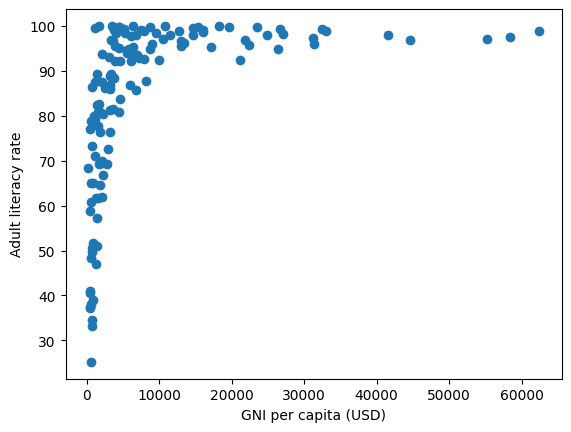

In [9]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
adult_literacy_rate = world_df['Adult literacy rate']
plt.scatter(x = GNI_per_capita, y = adult_literacy_rate)
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Adult literacy rate')
plt.show()
# TODO

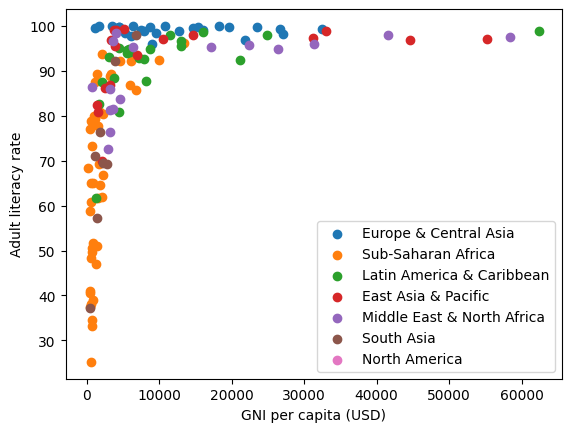

In [10]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# cho mỗi Region với màu khác nhau
regions = ['Europe & Central Asia', 'Sub-Saharan Africa', 'Latin America & Caribbean',
           'East Asia & Pacific', 'Middle East & North Africa', 'South Asia', 'North America']
GNI_region = world_df.groupby('Region')['GNI per capita (USD)']
ALR_region = world_df.groupby('Region')['Adult literacy rate'] # ALR = adult literacy rate

for region in regions:
    plt.scatter(x = GNI_region.get_group(region), y = ALR_region.get_group(region), label = region)
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Adult literacy rate')
plt.legend()
plt.show()
# TODO

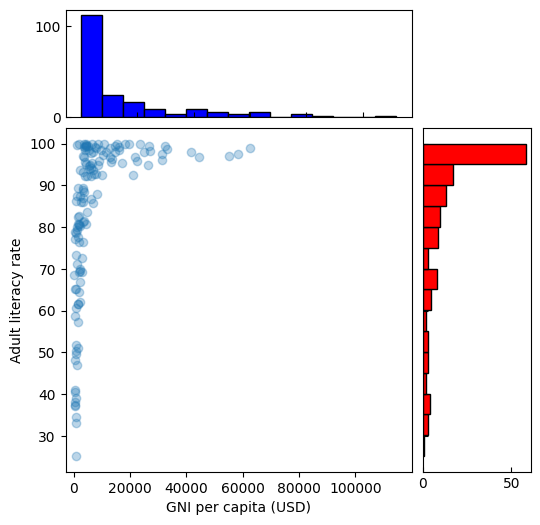

In [11]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# Cùng với hai histogram ở hai trục
GNI_per_capita = world_df['GNI per capita (USD)']
adult_literacy_rate = world_df['Adult literacy rate']

fig = plt.figure(figsize = (6, 6))
grid = plt.GridSpec(4, 4, wspace = 0.1, hspace = 0.1)

main_ax = fig.add_subplot(grid[1:, :-1])
x_hist = fig.add_subplot(grid[0, :-1], xticklabels = [])
y_hist = fig.add_subplot(grid[1:, -1], yticklabels = [])

main_ax.scatter(x = GNI_per_capita, y = adult_literacy_rate, alpha = 0.3)

x_hist.hist(GNI_per_capita, bins = 15, orientation = 'vertical', color = 'blue', edgecolor = 'black')
y_hist.hist(adult_literacy_rate, bins = 15, orientation = 'horizontal', color = 'red', edgecolor = 'black')

main_ax.set_xlim(right = 120000)
main_ax.set_xticks(np.arange(0, 119000, 20000))

x_hist.tick_params(direction = 'in')
y_hist.tick_params(direction = 'in')

x_hist.set_yticks([0, 100])
y_hist.set_xticks([0, 50])

main_ax.set_xlabel('GNI per capita (USD)')
main_ax.set_ylabel('Adult literacy rate')

plt.show()
# TODO